<a href="https://colab.research.google.com/github/sk-aili/Practice/blob/main/bigmart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

## Introduction

Sales forecasting enables business to allocate resources for future growth while managing cashflow properly. It also assists firms in estimating their expenditure and revenue precisely, allowing them to predict their short- and long-term success.    

Retail sales forecasting also assists retailers in meeting customer expectations by better understanding consumer purchasing trends. This results in more efficient use of shelf and display space within the retail establishment and optimal use of inventory space.

## Problem statement
Given the data, we wish to predict the sales of each product at a particular store. From this project, we are hoping to understand the properties of products and stores, which are crucial in increasing sales and developing business strategies.

## Project Plan
1. Setup the project
    - create a virtual enviorment
    - install the requirements
    - import the packages
    - data collection - reading the data
2. Data Cleaning and preprocessing
3. Exploratory data analysis
4. Feature Engineering
5. Model Building
6. Model evaluation
7. Model deployment - *out of scope*
8. Model monitoring and maintenance - *out of scope*
9. Documentation and reporting - *out of scope*

# Setup the project

Create the virtual environment
```
python3 -m venv env
source env/bin/activate
```

Install the requirements

In [ ]:
%pip install -r ../requirements.txt

  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
  Using cached pandas-1.5.2-cp39-cp39-macosx_11_0_arm64.whl (10.9 MB)
  Using cached matplotlib-3.6.2-cp39-cp39-macosx_11_0_arm64.whl (7.2 MB)
  Using cached scikit_learn-1.2.0-cp39-cp39-macosx_12_0_arm64.whl (8.3 MB)
  Using cached pygam-0.8.0-py2.py3-none-any.whl (1.8 MB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached contourpy-1.1.0-cp39-cp39-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp39-cp39-macosx_10_9_universal2.whl (2.6 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
  Using cached Pillow-9.5.0-cp39-cp39-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.

In [ ]:
# Multivariate Adaptive Regression Splines
#! git clone -b issue191 https://github.com/jcrudy/py-earth.git

Cloning into 'py-earth'...
remote: Enumerating objects: 3723, done.
remote: Total 3723 (delta 0), reused 0 (delta 0), pack-reused 3723
Receiving objects: 100% (3723/3723), 19.17 MiB | 22.30 MiB/s, done.
Resolving deltas: 100% (2719/2719), done.


In [ ]:
#! cd py-earth && sudo python setup.py install --cythonize

Password:
sudo: a password is required


In [ ]:
#from pyearth import Earth

In [ ]:
# Generalized Additive Models
! pip install pygam --quiet

Import packages

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from numpy import hstack
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM, PoissonGAM, GammaGAM

from sklearn.ensemble import VotingRegressor, StackingRegressor

from sklearn.metrics import r2_score

Data collection - reading the data

In [ ]:
df = pd.read_csv('../input/train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning and Preprocessing

About data - shape of the data, column names, null values etc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


data contains 8523 observations and 12 columns. Out of these 12 features, 7 are object type (categorical), 4 floating type, and 1 is integer type. From the initial analysis, there are null values in two columns, and the response variable(Item_Outlet_Sales) doesn't have any null values.

Handle the null values in the 2 columns - Item_Weight and Outlet_Size

In [ ]:
df['Item_Weight'].isna().sum()

1463

1463 null values in Item_Weight

<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

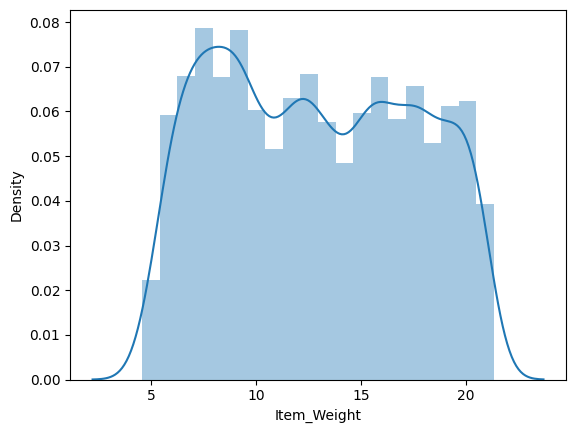

In [ ]:
sns.distplot(df['Item_Weight'])

In [ ]:
df['Item_Identifier'].unique().__len__()

1559

There are 1559 unique item-identifiers.

In [ ]:
df.groupby('Item_Identifier')['Item_Weight'].transform('max')

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

Impute the Item Weight with its respective group's maximum value based on item identifier

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('max'))

In [ ]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
len(df.loc[df['Outlet_Size'] == 'Small']['Item_Identifier'].unique())

1399

In [ ]:
len(df.loc[df['Outlet_Size'] == 'High']['Item_Identifier'].unique())

932

In [ ]:
len(df.loc[df['Outlet_Size'] == 'Medium']['Item_Identifier'].unique())

1476

In [ ]:
len(df.loc[df['Outlet_Size'].isna()]['Item_Identifier'].unique())

1393

Impute the missing values in Outlet size with 'Small'

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("Small")
df.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 4 null values in Item Weight. Removing those observations.

In [ ]:
df = df[df['Item_Weight'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Now, there are no null values in the data. Let's check whether there are any duplicates or incorrect spelling.

In [ ]:
df.Item_Fat_Content.value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Replacing the duplicates in Item_Fat_Content

In [ ]:
df.replace({
    'Item_Fat_Content' :{
        'low fat': 'Low Fat',
        'LF': 'Low Fat',
        'reg': 'Regular'
    }
}, inplace=True)
df.Item_Fat_Content.value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# Exploratory Data Analysis

To understand data patterns, spot anomalies, check assumptions etc. It helps us look into the data before making any hypothesis about it.

Count plot for Outlet size

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

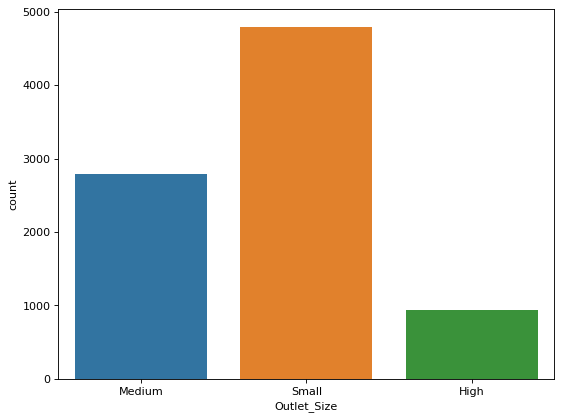

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.countplot(x='Outlet_Size', data=df)

It is visible that the small outlet stores are much more in number.

Count plot for outlet type

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

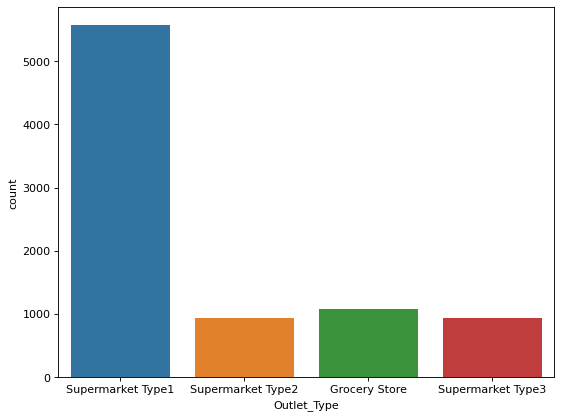

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.countplot(x='Outlet_Type', data=df)

Supermarket Type 1 is the most frequent outlet type in the data.

Count plot for outlet establishment year

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

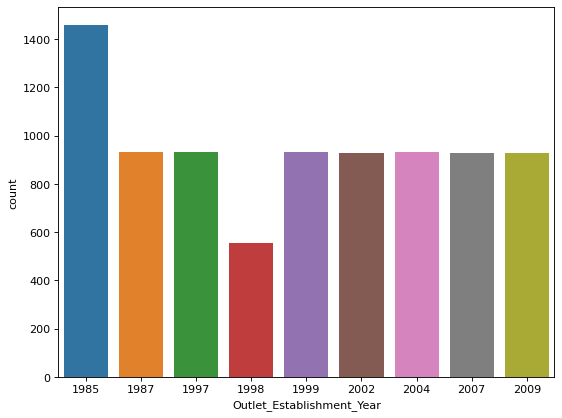

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.countplot(x='Outlet_Establishment_Year', data=df)

More stores were opened in the year 1985 and least in 1998.

Distribution of Item weight

<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

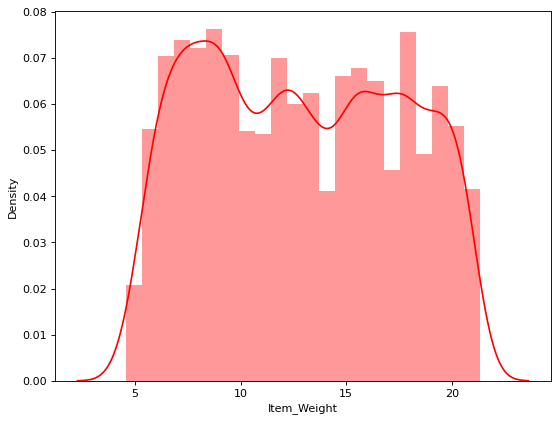

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.distplot(df['Item_Weight'], color='red')

Log-transformation on Item weight

<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

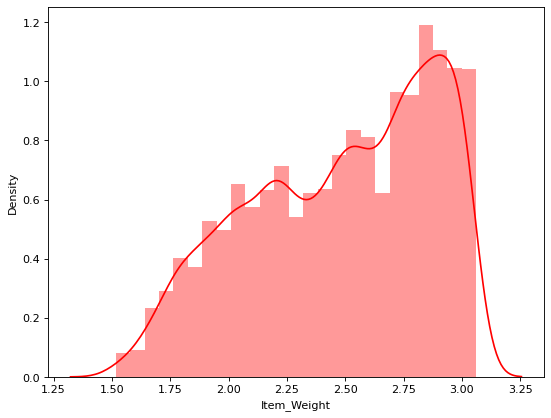

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.distplot(np.log(df['Item_Weight']), color='red')

The log-transformation on item weight is right skewed

Distribution of Item visibility

<AxesSubplot: xlabel='Item_Visibility', ylabel='Density'>

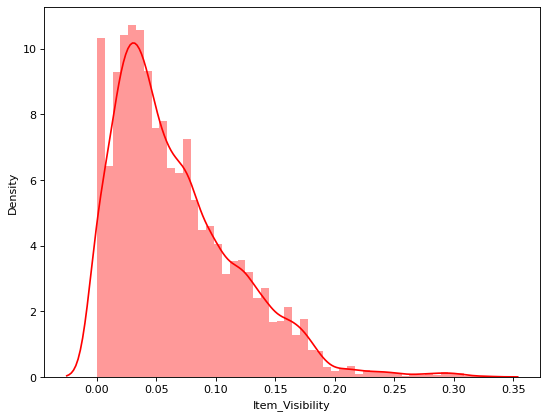

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.distplot(df['Item_Visibility'], color='red')

The distribution of item visibility is left skewed

Distribution of Item MRP

<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

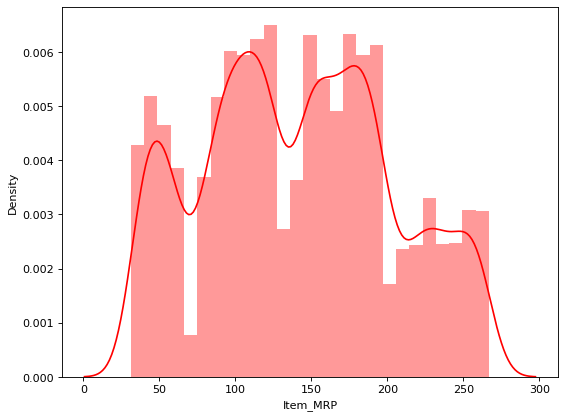

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.distplot(df['Item_MRP'], color='red')

No clear distribution on Item MRP. Apply log-transformation on it

<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

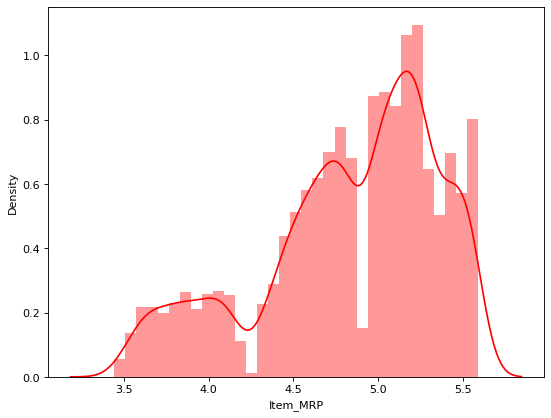

In [ ]:
plt.figure(figsize=(8,6), dpi=80)
sns.distplot(np.log(df['Item_MRP']), color='red')

Log transformation on Item MRP looks right skewed

Distribution of Item MRP on Outlet Sales

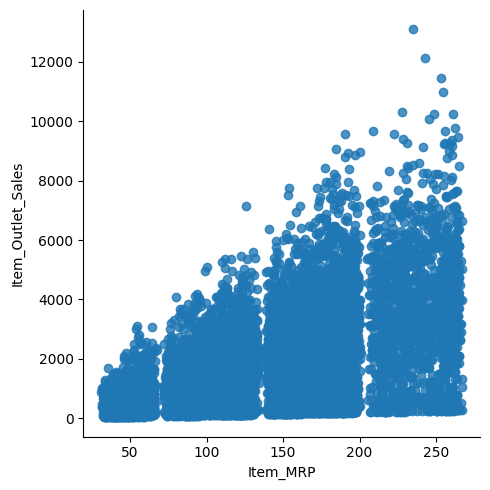

In [ ]:
sns.lmplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')

As the item MRP increases, the item sales increases.

Distribution of Item visibility on outlet sales

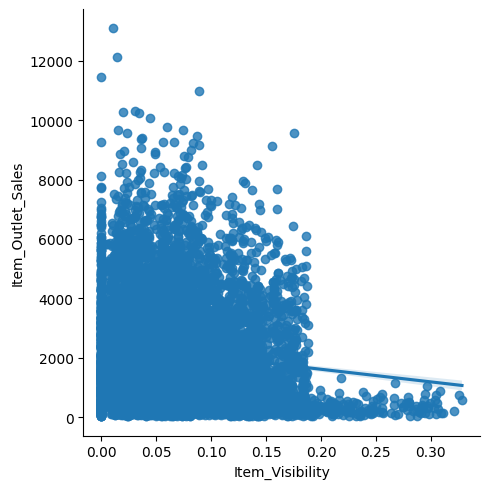

In [ ]:
sns.lmplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales')

Distribution of each item type on outlet sales

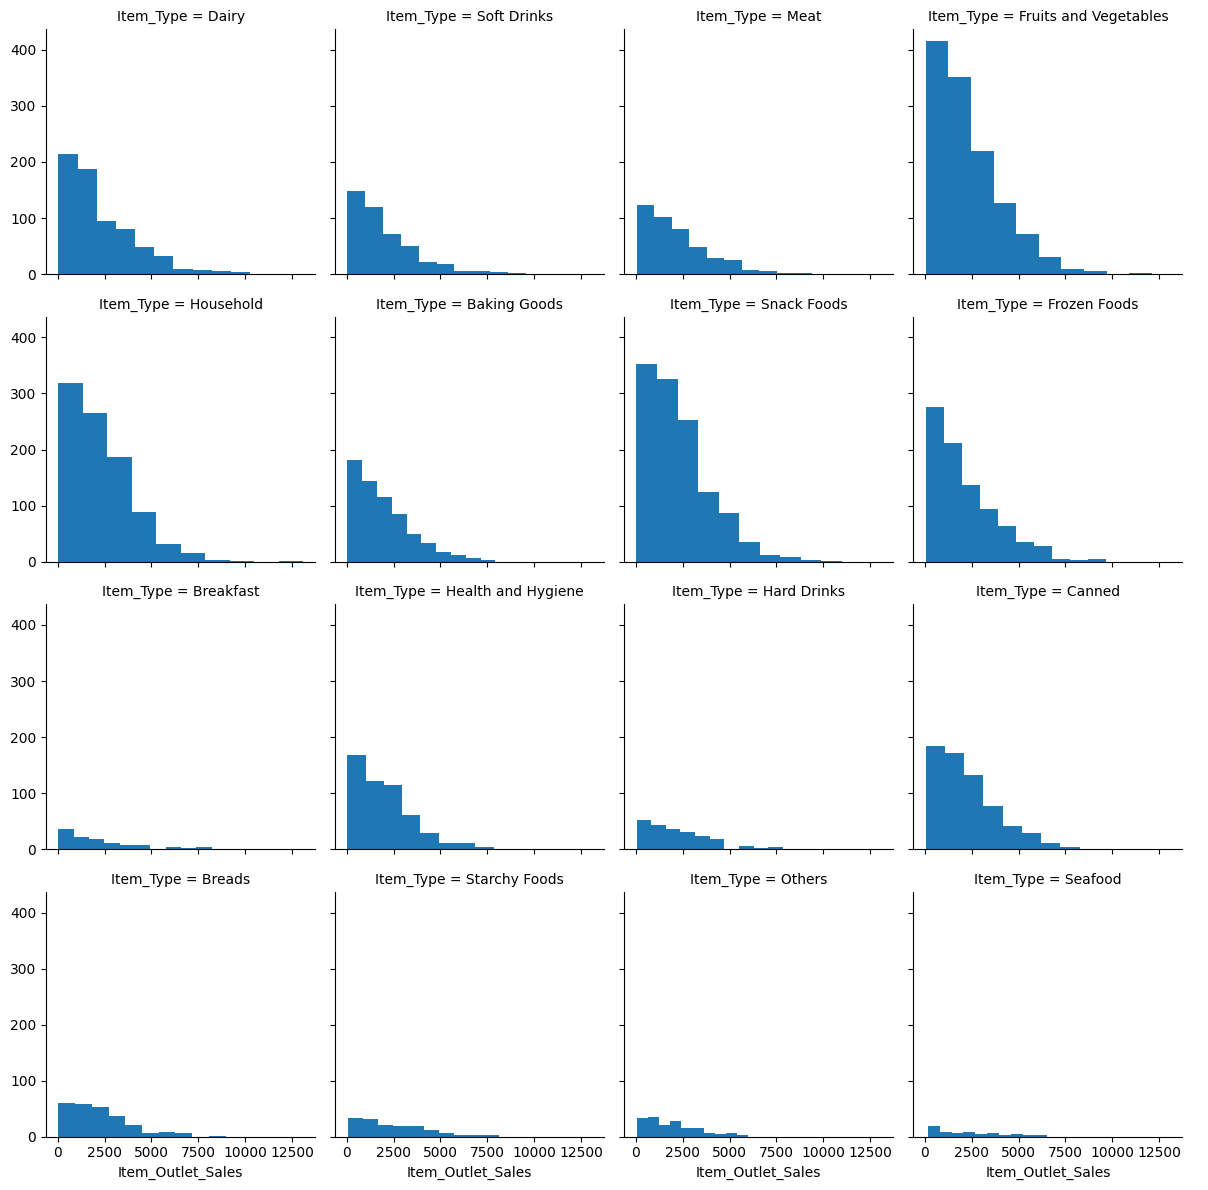

In [ ]:
sns.FacetGrid(df, col='Item_Type', col_wrap=4)\
.map(plt.hist, 'Item_Outlet_Sales')\
.add_legend()

Correlation: Heatmap of numerical variables

<AxesSubplot: >

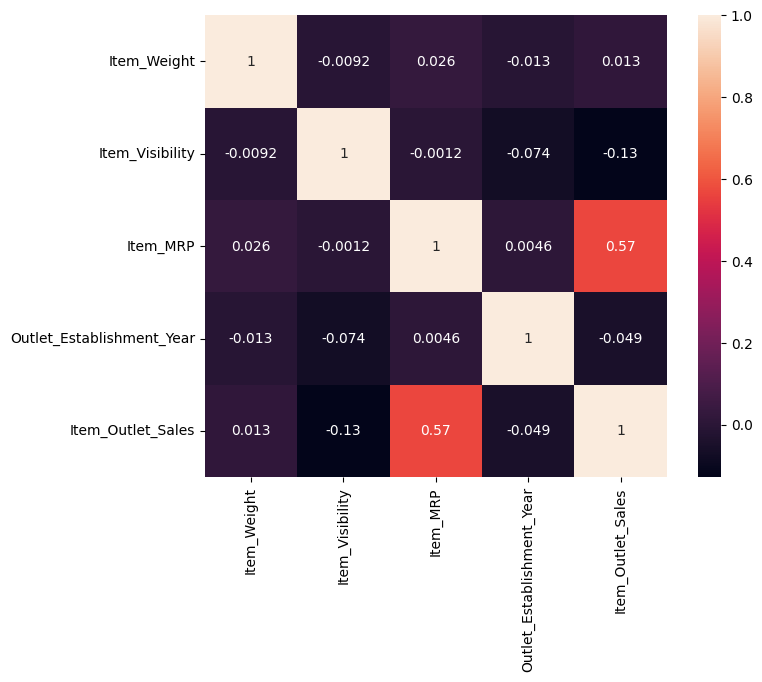

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cbar=True, square=True, annot=True)

Categorical Correlation: Chi squared test between outlet size and outlet type

In [ ]:
cross_tab = pd.crosstab(index=df['Outlet_Size'], columns=df['Outlet_Location_Type'])
cross_tab

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1860
Small,1457,2785,555


chi-squared contingency table: Hypothesis testing      
H0: There is no significance between outlet type and size    
H1: There is some significance between outlet type and size

In [ ]:
result = chi2_contingency(cross_tab)
result

Chi2ContingencyResult(statistic=4804.376637943735, pvalue=0.0, dof=4, expected_freq=array([[ 261.14379622,  304.68599601,  366.17020777],
       [ 781.75020542,  912.0964902 , 1096.15330438],
       [1344.10599836, 1568.21751379, 1884.67648785]]))

The p-value is 0.0

Crammer's V Test

In [ ]:
def crammers_v(var1, var2):
    cross_tab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(cross_tab)[0]
    obs = np.sum(cross_tab)
    var3 = min(cross_tab.shape) - 1
    return (stat/(obs*var3))

In [ ]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in df[['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type']].columns:
    data_encoded[i] = label.fit_transform(df[i])

In [ ]:
data_encoded

,Outlet_Type,Outlet_Size,Outlet_Location_Type
0,1,1,0
1,2,1,2
2,1,1,0
3,0,2,2
4,1,0,2
...,...,...,...
8514,1,0,2
8515,1,2,1
8516,1,2,1
8517,2,1,2


In [ ]:
var4 = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        crammers = crammers_v(data_encoded[var1], data_encoded[var2])
        col.append(round(crammers, 2))
    var4.append(col)

crammers_results = np.array(var4)

result_cv = pd.DataFrame(crammers_results, columns=data_encoded.columns, index=data_encoded.columns)

In [ ]:
result_cv

,Outlet_Type,Outlet_Size,Outlet_Location_Type
Outlet_Type,1.00,0.32,0.28
Outlet_Size,0.32,1.00,0.28
Outlet_Location_Type,0.28,0.28,1.00


One-way ANOVA     
Finding correlation between 1 numeric and 1 categorical     
H0: There is no correlation    
H1: There is correlation     
if p < 0.05 --> Reject null hypothesis

In [ ]:
anova_prep_res = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].apply(list)
anova_prep_res

Outlet_Location_Type
Tier 1    [3735.138, 2097.27, 1516.0266, 2187.153, 1589....
Tier 2    [1076.5986, 4710.535, 2748.4224, 1587.2672, 83...
Tier 3    [443.4228, 732.38, 994.7052, 556.6088, 343.552...
Name: Item_Outlet_Sales, dtype: object

In [ ]:
anova_results = f_oneway(*anova_prep_res)
anova_results

F_onewayResult(statistic=53.64761754128398, pvalue=7.025683417882415e-24)

The p-value is 7.025683417882415e-24

# Feature Engineering

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Modifying Outlet Establishment Year to Outlet age

In [ ]:
df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']
df = df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,36


In [ ]:
df.columns.to_list()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'Outlet_Age']

Label Encoding

In [ ]:
le = LabelEncoder()
cols_to_encode = [
 'Item_Fat_Content',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

df_new = df.drop(columns=['Item_Identifier'])
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,Dairy,249.8092,9,1,0,1,3735.1380,24
1,5.92,1,0.019278,Soft Drinks,48.2692,3,1,2,2,443.4228,14
2,17.50,0,0.016760,Meat,141.6180,9,1,0,1,2097.2700,24
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,0,2,2,0,732.3800,25
4,8.93,0,0.000000,Household,53.8614,1,0,2,1,994.7052,36


In [ ]:
df_new = pd.get_dummies(df_new)
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380,24,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,3,1,2,2,443.4228,14,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700,24,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,0,2,2,0,732.3800,25,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,36,...,0,0,0,1,0,0,0,0,0,0


Split data: 75% training set, 25% test set

In [ ]:
X = df_new.drop(columns=['Item_Outlet_Sales'])
y = df_new['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

print("Training set size: (X,y): ({0},{1})".format(len(X_train), len(y_train)))
print("Test set size: (X,y): ({0},{1})".format(len(X_test), len(y_test)))

Training set size: (X,y): (6815,6815)
Test set size: (X,y): (1704,1704)


# Modelling

List of models to perform experimenting on the data

In [ ]:
models = [
    ('LR', LinearRegression()),
    ('ElasticNet', ElasticNet()),
    ('RF', RandomForestRegressor()),
    ('ETR', ExtraTreesRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ('MLP', MLPRegressor())
]

Function to verify cross-validation scores on each model

In [ ]:
def model_selection_function(X, y, cross_folds, models):
    scores = []
    names = []

    for name, model in models:
        cv_scores = cross_val_score(model, X, y, cv=cross_folds, n_jobs=-1)
        scores.append(cv_scores)
        names.append(name)

    for k in range(len(scores)):
        print(names[k], scores[k].mean())

    return

3-folds

In [ ]:
model_selection_function(X_train, y_train, 3, models)

/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/sales-prediction/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


LR 0.5044046416831237
ElasticNet 0.4805558357953974
RF 0.5588137949128678
ETR 0.5065904830781705
GBM 0.5997002244550634
MLP 0.49229682198634644


/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/sales-prediction/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/sales-prediction/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


5-folds

In [ ]:
model_selection_function(X_train,y_train,5,models)

/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/sales-prediction/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/sales-prediction/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/sales-prediction/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/

LR 0.5039658794049181
ElasticNet 0.4795008805547177
RF 0.5601472290752949
ETR 0.5165028393764655
GBM 0.5991605656822608
MLP 0.5042206889471259


/Users/saili/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Bag/projects/sales-prediction/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Splines Regression

In [ ]:
model = make_pipeline(SplineTransformer(n_knots= 3, degree= 5), LinearRegression())

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
scores

array([0.53189467, 0.57402707, 0.56870925, 0.55168997, 0.57691704])

In [ ]:
scores.mean()

0.5606476009717726

## Multivariate Adaptive Regression Splines

In [ ]:
#model = Earth(max_degree= 5, endspan= 20)

#scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs= -1)
#scores

In [ ]:
#scores.mean()

## Generalized Additive models GAM

In [ ]:
gam = PoissonGAM(n_splines=5).gridsearch(X_train.values, y_train)
gam.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:33 ETA:   0:05:39


did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:01:19 ETA:   0:06:48


did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:01:43 ETA:   0:03:11


did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:02:35 ETA:   0:06:02


did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:03:00 ETA:   0:02:32


did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:03:18 ETA:   0:01:31


did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:03:35 ETA:   0:01:08


did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:03:51 ETA:   0:00:45


did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:04:21 ETA:   0:01:01


did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:04:37 ETA:   0:00:15


did not converge


100% (11 of 11) |########################| Elapsed Time: 0:04:50 Time:  0:04:50


did not converge
PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     37.9982
Link Function:                          LogLink Log Likelihood:                              -1403694.3341
Number of Samples:                         6815 AIC:                                          2807464.6645
                                                AICc:                                          2807465.125
                                                UBRE:                                             404.8325
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6836
Feature Function    

So far, the models are performing under 60% R2 squared. Let's apply ensembling techniques: voting regressor, model stacking, and model blending.

## Model Ensembling techniques

Voting Regressor

In [ ]:
reg1 = LinearRegression()
reg2 = GradientBoostingRegressor()
reg3 = MLPRegressor()

In [ ]:
voting_regressor = VotingRegressor(estimators=[('LR', reg1), ('GBM', reg2), ('MLP', reg3)])
voting_regressor

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('GBM', GradientBoostingRegressor()),
                            ('MLP', MLPRegressor())])

In [ ]:
scores = cross_val_score(voting_regressor, X_train, y_train, cv=3)
scores

array([0.55026167, 0.56163585, 0.56390564])

In [ ]:
scores.mean()

0.5586010530366963

Model Stacking

In [ ]:
reg1 = LinearRegression()
reg2 = GradientBoostingRegressor()
estimators = [('LR', reg1), ('GBM', reg2)]
estimators

[('LR', LinearRegression()), ('GBM', GradientBoostingRegressor())]

In [ ]:
level1_estimator = MLPRegressor()
level1_estimator

MLPRegressor()

In [ ]:
stacking_model = StackingRegressor(estimators=estimators, final_estimator=level1_estimator)
stacking_model

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('GBM', GradientBoostingRegressor())],
                  final_estimator=MLPRegressor())

In [ ]:
scores = cross_val_score(stacking_model, X_train, y_train, cv=3)
scores

array([0.59657347, 0.60421808, 0.60278474])

In [ ]:
scores.mean()

0.6011920945081132

Model Blending

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('GBR', GradientBoostingRegressor()))
models

[('LR', LinearRegression()), ('GBR', GradientBoostingRegressor())]

Creating Validation set

In [ ]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=22)

print("Training set size: (X,y): ({0},{1})".format(len(X_train1), len(y_train1)))
print("Test set size: (X,y): ({0},{1})".format(len(X_val), len(y_val)))

Training set size: (X,y): (6133,6133)
Test set size: (X,y): (682,682)


In [ ]:
def fit_all_models(models, X_train, X_val, y_train, y_val):
    level1_fit = []

    for name, model in models:
        model.fit(X_train, y_train)
        y_hat = model.predict(X_val)
        y_hat = y_hat.reshape(len(y_hat), 1)
        level1_fit.append(y_hat)

    level1_fit = hstack(level1_fit)
    level1_estimator = MLPRegressor()
    level1_estimator.fit(level1_fit, y_val)

    return level1_estimator

In [ ]:
def pred_data(models, blends, X_test):
    meta_model_X = []

    for name, model in models:
        y_hat = model.predict(X_test)
        y_hat = y_hat.reshape(len(y_hat), 1)
        meta_model_X.append(y_hat)

    meta_model_X = hstack(meta_model_X)

    return blends.predict(meta_model_X)

In [ ]:
model_blending = fit_all_models(models, X_train1, X_val, y_train1, y_val)
model_blending

MLPRegressor()

In [ ]:
y_hat = pred_data(models, model_blending, X_train)
y_hat

array([2035.52069819, 1585.14296074, 3000.91786253, ..., 1044.25041643,
       2557.07540567, 4107.14261107])

## Model Evaluation

In [ ]:
r2_score(y_train, y_hat)

0.6374977942191961

In [ ]:
scores = cross_val_score(model_blending, X_train, y_train, cv= 3)
scores

array([0.48795615, 0.48648549, 0.47331383])

In [ ]:
y_pred = pred_data(models, model_blending, X_test)
y_pred

array([2438.76209479,  682.6054158 , 2420.89202364, ..., 5297.65462958,
       3385.15603569, 1820.5173043 ])

In [ ]:
r2_score(y_test, y_pred)

0.5739802329289442

In [ ]:
# Stacking model
model_stack = stacking_model.fit(X_train, y_train)
model_stack

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('GBM', GradientBoostingRegressor())],
                  final_estimator=MLPRegressor())

In [ ]:
y_pred = model_stack.predict(X_test)
y_pred

array([2485.78781892,  671.66866227, 2463.42726402, ..., 5038.71903066,
       3368.5171191 , 1758.32965628])

In [ ]:
r2_score(y_test, y_pred)

0.5746225770483842

In [ ]:
# GBM
model_gbm = GradientBoostingRegressor()
model_gbm.fit(X_train, y_train)
model_gbm

GradientBoostingRegressor()

In [ ]:
y_pred = model_gbm.predict(X_test)
y_pred

array([2450.77905852,  650.28103778, 2388.83846097, ..., 5027.36235972,
       3236.67298446, 1760.22966786])

In [ ]:
r2_score(y_test, y_pred)

0.5739144712468789

In [ ]:
model_gbm = GradientBoostingRegressor()
scores = cross_val_score(model_gbm, X, y, cv=5)
scores

array([0.60891819, 0.57464321, 0.5765881 , 0.60324683, 0.60556743])

In [ ]:
scores.mean()

0.5937927511761781

In [ ]:
scores = cross_val_score(model_gbm, X, y, cv=3)
scores

array([0.5927093 , 0.5899094 , 0.59957846])

In [ ]:
scores.mean()

0.5940657237781752

In [ ]:
gam = PoissonGAM(n_splines = 5).gridsearch(X_train.values, y_train)
gam

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:53 ETA:   0:08:56


did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:01:22 ETA:   0:04:19


did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:02:18 ETA:   0:07:24


did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:02:45 ETA:   0:03:09


did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:03:12 ETA:   0:02:44


did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:03:41 ETA:   0:02:24


did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:04:07 ETA:   0:01:43


did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:04:21 ETA:   0:00:42


did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:04:52 ETA:   0:01:02


did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:05:13 ETA:   0:00:20


did not converge


100% (11 of 11) |########################| Elapsed Time: 0:05:25 Time:  0:05:25


did not converge


PoissonGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + intercept,
   tol=0.0001, verbose=False)

In [ ]:
y_pred = gam.predict(X_test.values)
y_pred

array([2312.85955761,  649.45226023, 2281.68342816, ..., 4958.13300001,
       3218.6667063 , 1799.29355119])

In [ ]:
r2_score(y_test, y_pred)

0.5858675633430505

## Next steps

1. Save all encoders and models
2. Data validation tests
3. Dumping results back to database i.e. tracking results
4. Deploying